<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Use natural language to visualize U.S. Markets from Japan**


## Overview


近年、日本の個人投資家は、非課税投資枠(NISA)の導入により、米国の金融市場や株式が注目しています。ところが、日本に住んでいる間、アメリカ経済を体感するのは難しい。日本に住んでいる間にアメリカ株の投資タイミングを判断する方法はないのでしょうか。

前回は米国市場の強気（牛：Bull）と弱気（熊：Bear）を可視化することができたら、投資判断に使えるのではないかというのが、着眼点でした。
牛と熊、そしてLLMの羊、次は鳥：BlackSwanができました。

前回チャットGPTで作成したダッシュボードの設計ができました。列名を一緒にしてソーズのデータを差し替えるとどうなるでしょうか。
ダッシュボードが簡単に他の指数に転用が可能だと、そういうことになります。

差し替えるデータはBloombergのコモディティ指数です。これは金価格、原油価格をはじめ、麦など多数の商品先物価格を一括した価格指数です。
金と原油の価格に左右されやすいですが、なんとなく米国物価の感覚が掴めるかなと思ってダッシュボードにしてみます。


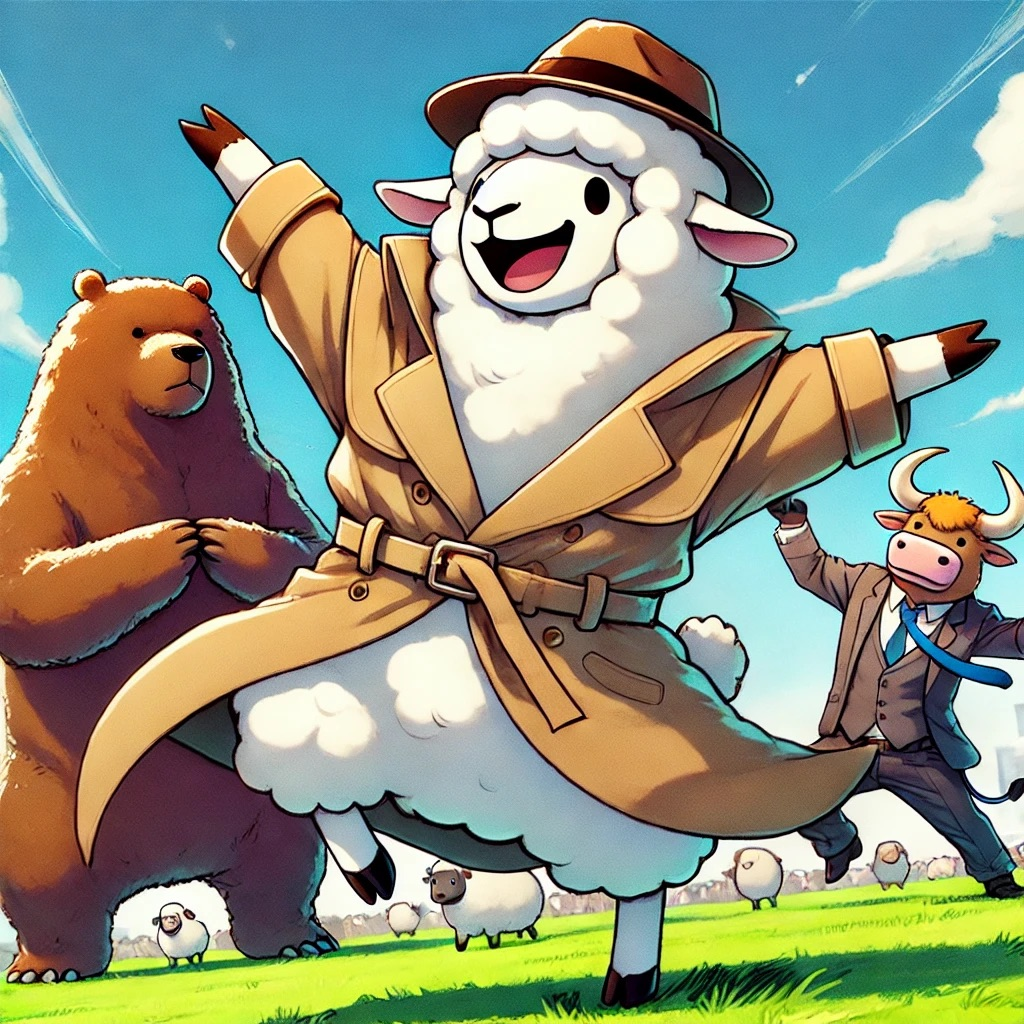

In [1]:
# Watson Llama もいいんですが、ChatGPTも面白いですね。
from IPython.display import Image
Image(filename='BullBear.jpeg')

----


## ChatGPT Visualization


### Installing required libraries

OllamaのLlama3.2のデータ可視化がイマイチだったので、ChatGPTで試してみたらとても良い感じでした。
ただ、トークンの使用料制限があるので、大きなデータを可視化しようとすると制限に引っかかってしまうし、もったいないです。
そこで、Chat GPTはダッシュボードの設計段階で使うことにしました。
ChatGPTから得られた可視化コードをローカルPC上のジュピターに移植する。以後のダッシュボードの更新はジュピター上で行うことで、トークンの使用量を節約しましょう、ということです。


In [3]:
!pip install matplotlib
!pip install seaborn
!pip install pyplot


ERROR: Could not find a version that satisfies the requirement pyplot (from versions: none)
ERROR: No matching distribution found for pyplot


In [5]:
import os
import pandas as pd


## Data set


普段はYahoo!ファイナンスのCSVダウンロードを使用していました。ところが最近、CSVダウンロード機能が、フリーからゴールド会員に料金変更されてしまいました。

これは大変残念なので、代替としてGoogle Sheetのグーグルファイナンス関数を使います。こちらはシートなので、データを見ながら関数が使えますから、マーケットデータの準備には大変良いツールです。

Blackswanの可視化ができたので、今度は素材：Bloomberg Commodity Price Indexをやってみます。
予めGoogleシート上で、関数　=GOOGLEFINANCE("AWZ24", "all", today()-2600, today(), "DAILY")

これは金や原油の金額で触れやすい印象です。実需だけでなく、投機でも振れてしまかもしれません。前日比で0.5％より低く上昇している場合はややBull（２）、それより上昇している時はとてもBull（３）、マイナス０.5％は逆を示します（１）。それよりもマイナスは逆を示します（０）。逆相関というか、高ければインフレということかと思います。

これをCSVにダウンロードして、次のプログラムで読み取っています。

In [7]:
#あらかじめgoogle sheet 上でGoogleファイナンス関数を使ってデータ準備をする。今回のティッカーはSKEWです。市場のリスク回避度を示す指数だと言われています。

data = pd.read_csv("AW.csv")


In [9]:
data.tail(20)


,Date,Open,High,Low,Close,Volume,DateGroup,Rate_To_PreviousDay,Bull_Bear
71,2024/10/28 23:58,99.60,99.60,98.10,98.26,1184,202410,-0.019753,0
72,2024/10/29 23:58,98.52,98.71,98.35,98.45,176,202410,0.001934,2
73,2024/10/30 23:58,98.38,98.91,98.34,98.89,421,202410,0.004469,2
74,2024/10/31 23:58,98.48,98.50,97.98,98.10,2599,202410,-0.007989,0
75,2024/11/01 23:58,99.09,99.09,97.95,98.07,426,202411,-0.000306,1
76,2024/11/04 23:58,98.70,99.04,98.64,98.91,644,202411,0.008565,3
77,2024/11/05 23:58,99.40,99.43,98.87,99.09,71,202411,0.001820,2
78,2024/11/06 23:58,95.82,98.30,95.82,98.13,1180,202411,-0.009688,0
79,2024/11/07 23:58,98.78,99.22,98.70,99.32,18,202411,0.012127,3
80,2024/11/08 23:58,98.76,98.76,98.30,98.13,33,202411,-0.011981,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 91 non-null     object 
 1   Open                 91 non-null     float64
 2   High                 91 non-null     float64
 3   Low                  91 non-null     float64
 4   Close                91 non-null     float64
 5   Volume               91 non-null     int64  
 6   DateGroup            91 non-null     int64  
 7   Rate_To_PreviousDay  91 non-null     float64
 8   Bull_Bear            91 non-null     int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 6.5+ KB


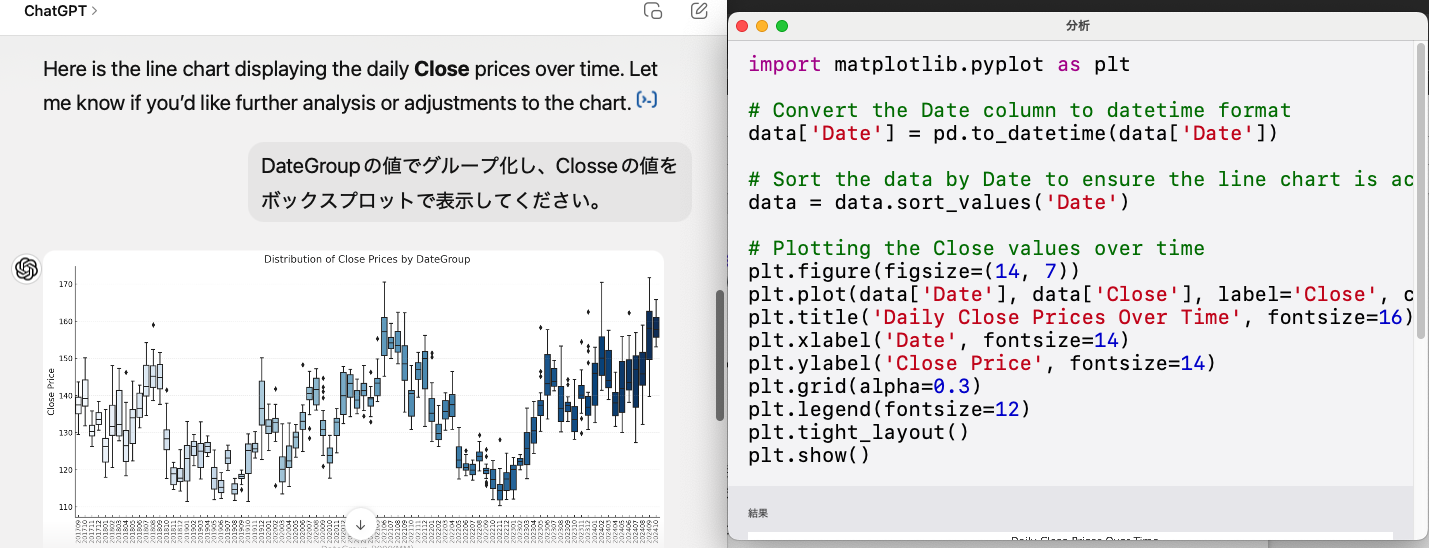

In [13]:
# ChatGPTのデータ可視化性能。ちなみの送ったプロンプトにミスタイプがありますが、意図を汲み取ってくれました。
from IPython.display import Image
Image(filename='ChatGPT_Visualization.png')


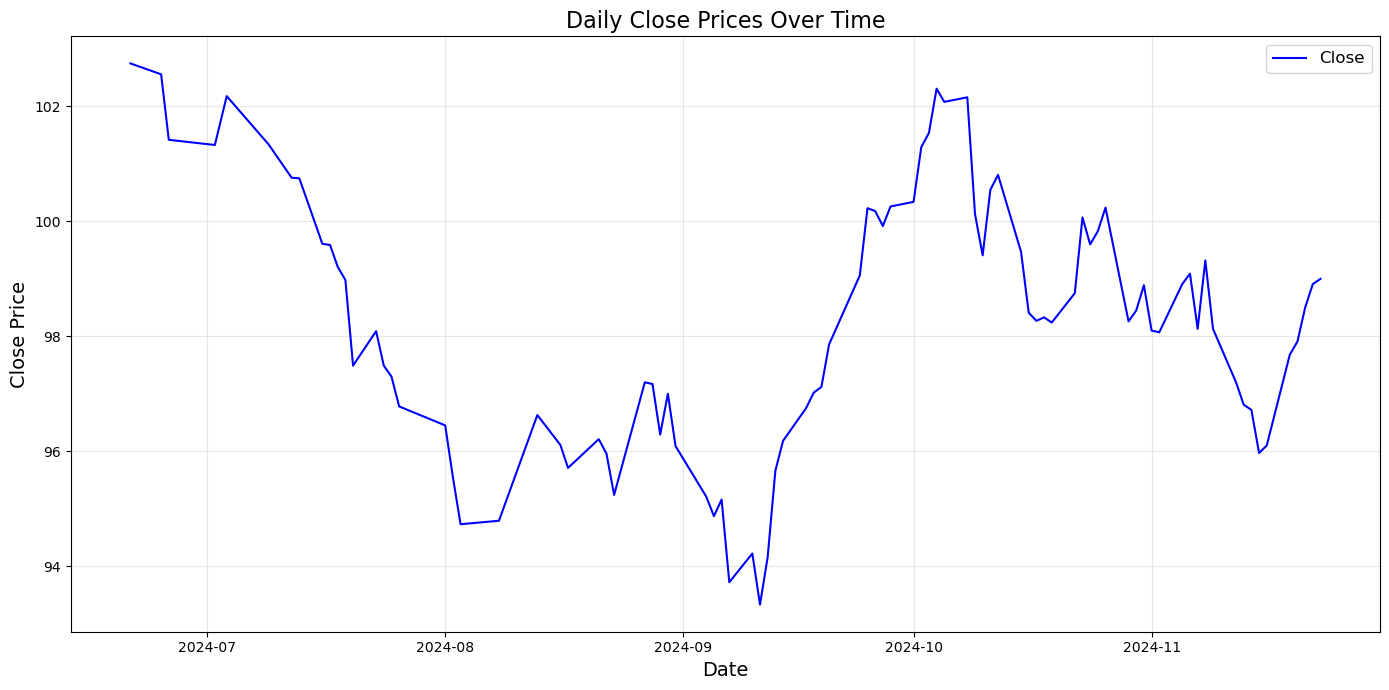

In [15]:
# 気に入ったダッシュボードのPythonコードを貼り付ける。
import matplotlib.pyplot as plt

# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by Date to ensure the line chart is accurate
data = data.sort_values('Date')

# Plotting the Close values over time
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close', color='blue', linewidth=1.5)
plt.title('Daily Close Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

/var/folders/ds/6kjlxy3155n7x7prhd6l8bym0000gn/T/ipykernel_6494/569228829.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DateGroup', y='Close', data=data, palette='Blues')


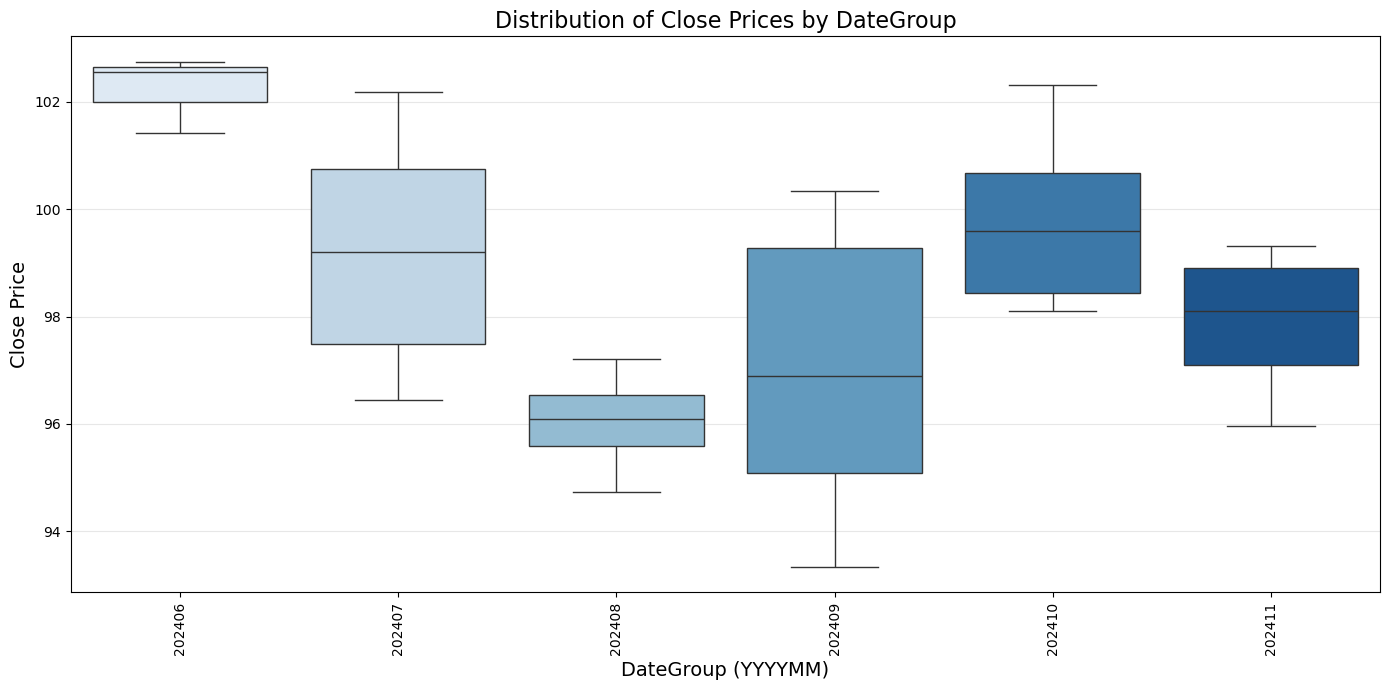

In [17]:
#ダッシュボードをインポートする。
import seaborn as sns

# Create a boxplot for Close values grouped by DateGroup
plt.figure(figsize=(14, 7))
sns.boxplot(x='DateGroup', y='Close', data=data, palette='Blues')

# Enhance plot aesthetics
plt.title('Distribution of Close Prices by DateGroup', fontsize=16)
plt.xlabel('DateGroup (YYYYMM)', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


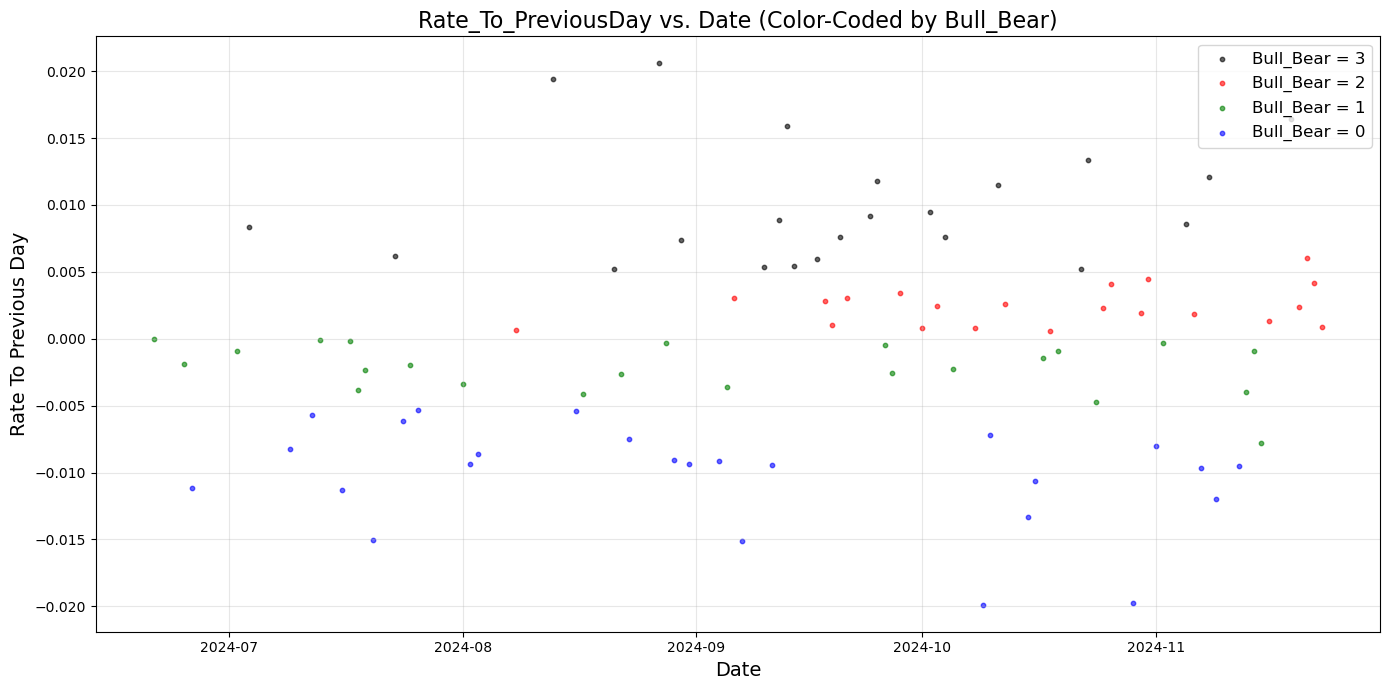

In [19]:
# Prepare a scatter plot for Rate_To_PreviousDay vs. Date with Bull_Bear color-coded

# Define a color map for Bull_Bear values
color_map = {3: 'black', 2: 'red', 1: 'green', 0: 'blue'}
data['Color'] = data['Bull_Bear'].map(color_map)

# Convert Date column to datetime format if not already converted
data['Date'] = pd.to_datetime(data['Date'])

# Plotting the scatter plot
plt.figure(figsize=(14, 7))
for bull_bear, color in color_map.items():
    subset = data[data['Bull_Bear'] == bull_bear]
    plt.scatter(subset['Date'], subset['Rate_To_PreviousDay'], 
                color=color, label=f'Bull_Bear = {bull_bear}', alpha=0.6, s=10)

# Enhance plot aesthetics
plt.title('Rate_To_PreviousDay vs. Date (Color-Coded by Bull_Bear)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Rate To Previous Day', fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

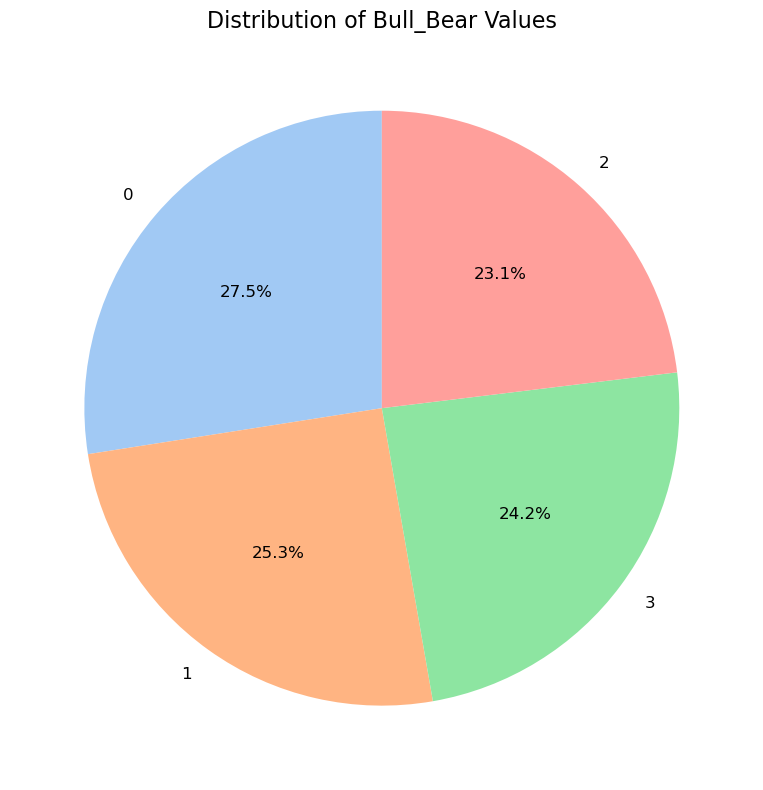

In [21]:
# Count the occurrences of each value in the Bull_Bear column
bull_bear_counts = data['Bull_Bear'].value_counts()

# Plot a pie chart for Bull_Bear value counts
plt.figure(figsize=(8, 8))
bull_bear_counts.plot.pie(
    autopct='%1.1f%%', 
    colors=sns.color_palette("pastel"), 
    startangle=90, 
    labels=bull_bear_counts.index, 
    textprops={'fontsize': 12}
)

# Enhance plot aesthetics
plt.title('Distribution of Bull_Bear Values', fontsize=16)
plt.ylabel('')  # Hide the y-axis label for a cleaner look
plt.tight_layout()
plt.show()

## Author


Yuya MORI